In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/csv/clicks_per_publisher_user_ip.csv')

# Frequency Encoding for 'ams_pblshr_id' (Publisher ID)
publisher_frequency = data['ams_pblshr_id'].value_counts()
data['ams_pblshr_id_encoded'] = data['ams_pblshr_id'].map(publisher_frequency)

# Frequency Encoding for 'buyer_id' (Buyer ID)
buyer_frequency = data['buyer_id'].value_counts()
data['buyer_id_encoded'] = data['buyer_id'].map(buyer_frequency)



In [2]:
print(data.head())

   ams_pblshr_id    buyer_id     CLNT_RMT_IP  click_count  \
0     5574630565  123-rooboo  172.226.114.64            5   
1     5574630565    12stamps  77.111.247.147            3   
2     5574630565    1mouses2    3.10.211.100            2   
3     5574630565    911gbite   109.169.34.29            2   
4     5574630565     ade0438   52.53.241.115            2   

   ams_pblshr_id_encoded  buyer_id_encoded  
0                  41109                19  
1                  41109                80  
2                  41109                25  
3                  41109                 8  
4                  41109                 4  


In [3]:

features = data[['ams_pblshr_id_encoded', 'buyer_id_encoded', 'click_count']]

# Standardize the features (scaling)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check the scaled features
print(features_scaled[:5])


[[ 0.08933402  1.03408204  0.20926115]
 [ 0.08933402  6.10348429  0.08974258]
 [ 0.08933402  1.53271177  0.0299833 ]
 [ 0.08933402  0.11992754  0.0299833 ]
 [ 0.08933402 -0.21249228  0.0299833 ]]


In [4]:
from sklearn.cluster import KMeans

# Apply K-means clustering (for example, with n_clusters = 3)
n_clusters = 2  # You can adjust this as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Check the clustering results
print(data[['ams_pblshr_id', 'buyer_id', 'click_count', 'cluster']].head())


   ams_pblshr_id    buyer_id  click_count  cluster
0     5574630565  123-rooboo            5        0
1     5574630565    12stamps            3        0
2     5574630565    1mouses2            2        0
3     5574630565    911gbite            2        0
4     5574630565     ade0438            2        0


In [13]:
# from sklearn.metrics import silhouette_score

# # Compute the silhouette score
# silhouette_avg = silhouette_score(features_scaled, data['cluster'])
# print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')


from sklearn.metrics import silhouette_score
import numpy as np

# Optionally, sample a subset of the data for silhouette score calculation to speed up
sampled_data = data.sample(frac=0.1, random_state=42)  # Adjust frac as needed
sampled_features_scaled = features_scaled[sampled_data.index]

# Compute the silhouette score on the sampled data
silhouette_avg = silhouette_score(sampled_features_scaled, sampled_data['cluster'])
print(f'Silhouette Score (approx.) for {n_clusters} clusters: {silhouette_avg}')


Silhouette Score (approx.) for 3 clusters: 0.5578319115490048


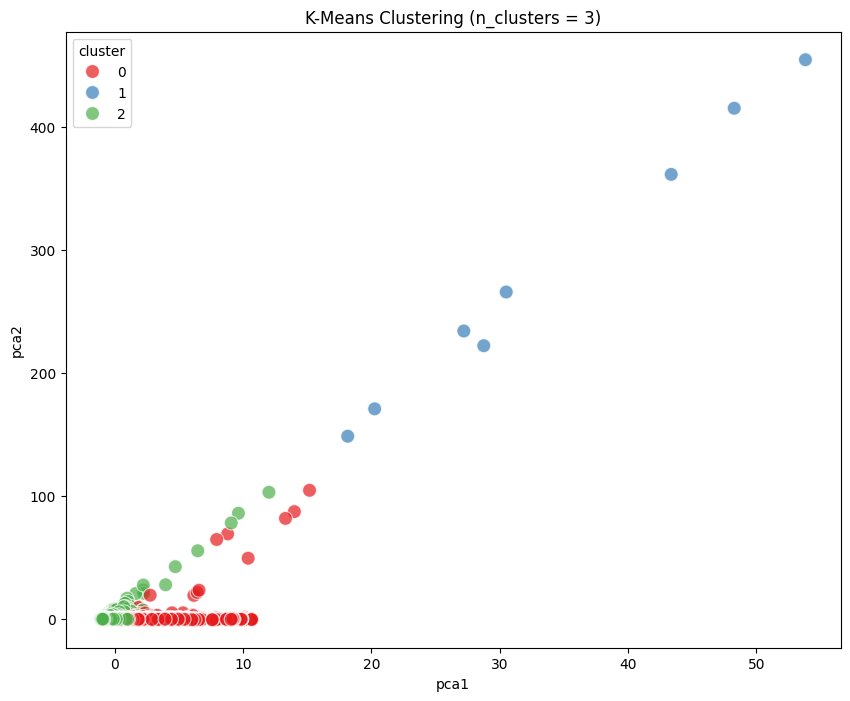

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Add PCA components to the data
data['pca1'] = pca_components[:, 0]
data['pca2'] = pca_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='Set1', s=100, alpha=0.7)
plt.title(f'K-Means Clustering (n_clusters = {n_clusters})')
plt.show()


In [15]:
data.to_csv('../data/csv/clicks_per_publisher_user_ip_cluster-3.csv', index_label=False)